In [23]:
import random
import statistics

def play_entire_game(num_simulations=10_000_000):
    """
    Simulate the described two-stage game multiple times and
    estimate its expected payout and variance via Monte Carlo.

    Game rules:
      1) Flip a fair coin.
         - If HEADS, flip again:
             => If HEADS again, lose 100 immediately (payout = -100, game ends).
             => If TAILS, proceed to Game1.
         - If TAILS on the first flip, proceed to Game1 directly.

      2) Game1:
         - Roll a fair six-sided die (uniform).
         - Flip a fair coin 4 times to count number of heads (Y).
         - The Game1 payout is X^Y, where X is the die result.

    Returns:
        (estimated_mean, estimated_variance)
    """
    payouts = []

    for _ in range(num_simulations):
        # Stage 1: "Two coin flips" logic
        first_flip = random.choice(['H','T'])
        if first_flip == 'H':
            second_flip = random.choice(['H','T'])
            if second_flip == 'H':
                # Lose 100 and end
                payouts.append(-100)
                continue
        #     else:
        #         # Proceed to Game1
        #         pass
        # else:
        #     # Tails on first flip -> proceed to Game1
        #     pass

        # Now we are in Game1
        # Roll a fair die (1 to 6)
        X = random.randint(1,6)
        # Flip 4 coins, count heads
        Y = sum(random.choice(['H','T']) == 'H' for __ in range(4))
        # Payout = X^Y
        payout = X**Y
        payouts.append(payout)

    # Compute empirical mean and variance
    estimated_mean = statistics.mean(payouts)
    # sample variance (unbiased); for large num_simulations close to true variance
    estimated_variance = statistics.pvariance(payouts)  

    return estimated_mean, estimated_variance

if __name__ == "__main__":
    mean_val, var_val = play_entire_game(num_simulations=1_000_000)
    print(f"Estimated Mean: {mean_val:.4f}")
    print(f"Estimated Variance: {var_val:.4f}")


Estimated Mean: 11.7718
Estimated Variance: 21401.5656


Ehancing this code with vectorization.

In [25]:
import numpy as np

size = 10_000_000
# Generate random values and assign 0.25 or 0.75 accordingly
random_values = np.random.uniform(0, 1, size)
result_vector = np.where(random_values < 0.25, 0.25, 0.75)

# Create an array of -100 (make sure it has the same length as result_vector)
array = np.full(size, -100)

# Create the game1Vector as defined
game1Vector = np.random.randint(1, 7, size) ** np.random.binomial(4, 0.5, size)

# Compute the final vector:
# For indices where result_vector is 0.25, multiply by array (-100)
# For indices where result_vector is 0.75, multiply by game1Vector
final_vector = np.where(result_vector == 0.25,
                        array,
                        game1Vector)

# Optionally, print or use final_vector
print(final_vector.size)
print(np.mean(final_vector))
print(np.var(final_vector))

10000000
11.5554822
21321.6940479255


The average variance over 1000 simulations is: 21316.2829


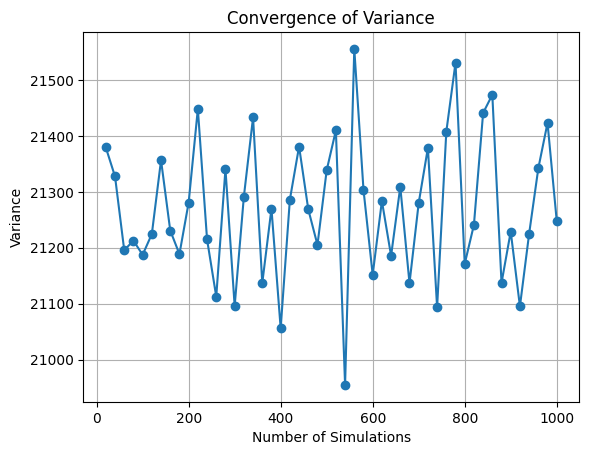

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(size):
    """
    Runs the simulation as defined in your provided code.

    Args:
        size: The size of the vectors to generate.

    Returns:
        The variance of the final_vector.
    """
    random_values = np.random.uniform(0, 1, size)
    result_vector = np.where(random_values < 0.25, 0.25, 0.75)
    array = np.full(size, -100)
    game1Vector = np.random.randint(1, 7, size) ** np.random.binomial(4, 0.5, size)
    final_vector = np.where(result_vector == 0.25, array, game1Vector)
    return np.var(final_vector)

# Parameters
n_simulations = 1000  # Number of times to run the simulation
vector_size = 10_000_00  # Size of the vectors in each simulation
plot_interval = 20  # Plot the variance every 20 simulations

# Store the variances
variances = []
plot_points = []

# Run the simulations
for i in range(n_simulations):
    variance = run_simulation(vector_size)
    variances.append(variance)

    # Store points for plotting
    if (i + 1) % plot_interval == 0:
        plot_points.append((i + 1, variance))

# Calculate the average of the variances
average_variance = np.mean(variances)

# Print the average variance
print(f"The average variance over {n_simulations} simulations is: {average_variance:.4f}")

# Plotting the results
x, y = zip(*plot_points)  # Unpack the plot points
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel("Number of Simulations")
plt.ylabel("Variance")
plt.title("Convergence of Variance")
plt.grid(True)
plt.show()

/home/sweethoney/anaconda3/envs/HackathonJan2025/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sweethoney/anaconda3/envs/HackathonJan2025/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


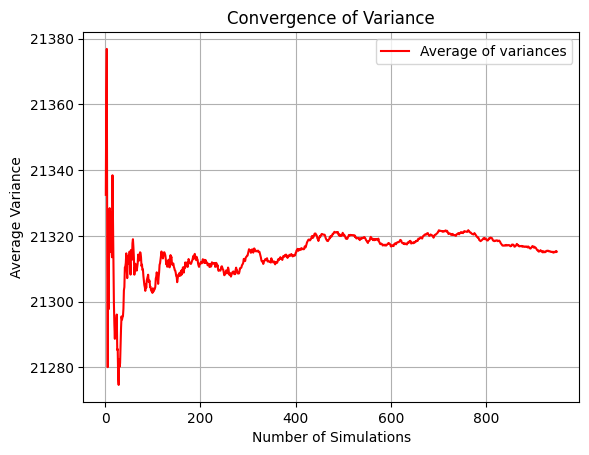

In [ ]:

moving_average = []
for i in range(50, len(variances) ):
    moving_average.append(np.mean(variances[50:i]))

plt.plot(moving_average, color='red', label="Average of variances")

plt.xlabel("Number of Simulations")
plt.ylabel("Average Variance")
plt.title("Convergence of Variance")
plt.grid(True)
plt.legend()
plt.show()
